In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# population csv
pop_csv_path = '/home/victor/Documents/actual_sample_names.csv'

In [3]:
# read into dataframe
df = pd.read_csv(pop_csv_path)
df

,Sample,Population
0,HG00096,GBR
1,HG00097,GBR
2,HG00099,GBR
3,HG00100,GBR
4,HG00101,GBR
...,...,...
2499,NA21137,GIH
2500,NA21141,GIH
2501,NA21142,GIH
2502,NA21143,GIH


In [4]:
# convert to dictionary with population as the key
df_dict = {}
for row in df.iterrows():
    sample_id, pop = row[1].values
    
    if pop not in df_dict:
        df_dict[pop] = []
        
    l = df_dict[pop]
    l.append(sample_id)
    df_dict[pop] = l

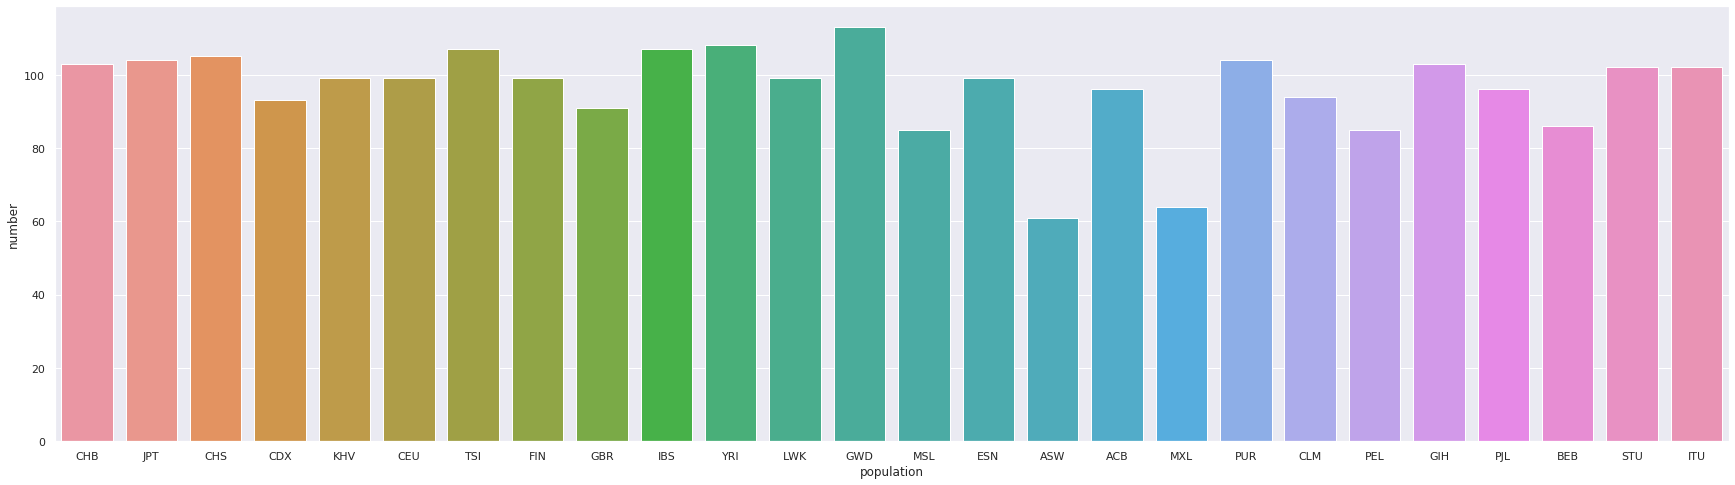

In [5]:
pop = ['CHB','JPT','CHS','CDX','KHV','CEU','TSI','FIN','GBR','IBS','YRI','LWK','GWD','MSL','ESN','ASW','ACB','MXL','PUR','CLM','PEL','GIH','PJL','BEB','STU','ITU']
num_pop = []
for p in pop:
    num_pop.append(len(df_dict[p]))

pop_data = pd.DataFrame(list(zip(pop, num_pop)), columns=['population', 'number'])

plt.figure(figsize=(30,8))
sns.set()
ax = sns.barplot(x="population", y="number", data=pop_data)


Extract 6 populations. Pick 2 populations from 3 super populations according to https://www.internationalgenome.org/category/population/
* AFR, African
* AMR, Ad Mixed American
* EAS, East Asian
* EUR, European
* SAS, South Asian

Chosen Populations:
* EAS: CHS, KHV
* AFR: LWK, GWD
* AMR: PUR, CLM

In [6]:
# extract the 6 chosen populations
sub_pop_key = ['CHS', 'KHV', 'LWK', 'GWD', 'PUR', 'CLM']

sub_sample = []
sub_pop = []

for k in sub_pop_key:
    sub_sample = sub_sample + df_dict[k]
    for i in range(len(df_dict[k])):
        sub_pop.append(k)

In [7]:
# save as csv
df_out = pd.DataFrame(list(zip(sub_sample,sub_pop)), columns=['Sample', 'Population'])

out_path = '/home/victor/Documents/sample_names_6_pop.csv'
df_out.to_csv(out_path, index=False)